In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score
import joblib
import matplotlib.pyplot as plt


### Read Updated Dataset 

In [2]:

df = pd.read_csv('E-commerce Customer Behavior.csv')


### Data Analysis

In [3]:

df.head()


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [5]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [6]:
print(sorted(df['Gender'].unique()))
print(sorted(df['City'].unique()))
print(sorted(df['Membership Type'].unique()))
print(sorted(df['Discount Applied'].unique()))
print(sorted(df['Satisfaction Level'].unique()))

['Female', 'Male']
['Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York', 'San Francisco']
['Bronze', 'Gold', 'Silver']
[False, True]
['Neutral', 'Satisfied', 'Unsatisfied']


### Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        350 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [8]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [9]:

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['City'] = le.fit_transform(df['City'])
df['Membership Type'] = le.fit_transform(df['Membership Type'])
df['Discount Applied'] = le.fit_transform(df['Discount Applied'])
df['Satisfaction Level'] = le.fit_transform(df['Satisfaction Level'])

features = df[['Gender', 'Age', 'City', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating', 
               'Discount Applied', 'Days Since Last Purchase']]

features.head()


,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,0,29,4,1,1120.20,14,4.6,1,25
1,1,34,2,2,780.50,11,4.1,0,18
2,0,43,0,0,510.75,9,3.4,1,42
3,1,30,5,1,1480.30,19,4.7,0,12
4,1,27,3,2,720.40,13,4.0,1,55


In [10]:
print(sorted(df['Gender'].unique()))
print(sorted(df['City'].unique()))
print(sorted(df['Membership Type'].unique()))
print(sorted(df['Discount Applied'].unique()))
print(sorted(df['Satisfaction Level'].unique()))

[0, 1]
[0, 1, 2, 3, 4, 5]
[0, 1, 2]
[0, 1]
[0, 1, 2]


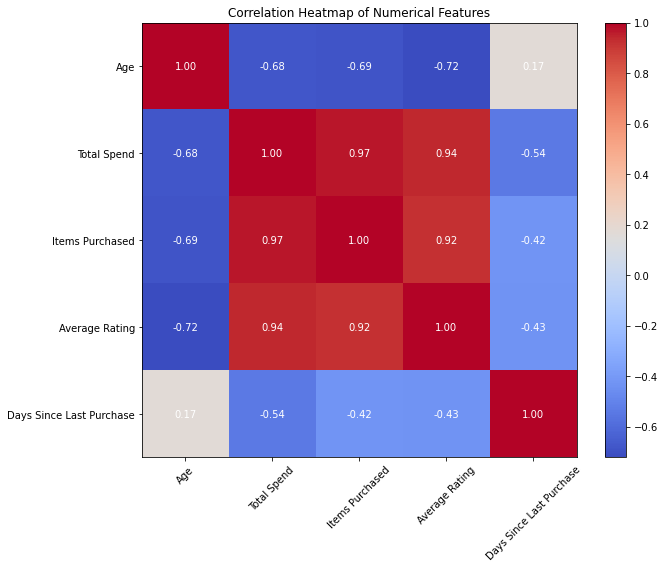

In [43]:
# Calculating correlations
corr = features[['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']].corr()

# Plotting the heatmap using imshow
plt.figure(figsize=(10, 8))
cax = plt.imshow(corr, interpolation='nearest', cmap='coolwarm')
plt.colorbar(cax)

# Setting up the axes with labels
labels = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)

# Adding annotations for the correlation values
for i in range(len(labels)):
    for j in range(len(labels)):
        text = plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                        ha="center", va="center", color="w")

plt.title('Correlation Heatmap of Numerical Features')
plt.show()


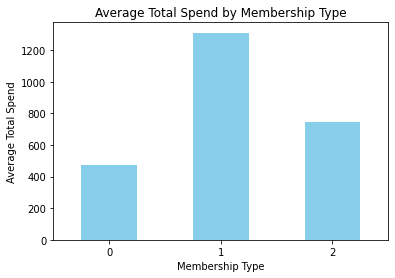

In [41]:
# Grouping by 'Membership Type' and calculating average spend
avg_spend_by_membership = df.groupby('Membership Type')['Total Spend'].mean()

# Plotting
avg_spend_by_membership.plot(kind='bar', color='skyblue')
plt.xlabel('Membership Type')
plt.ylabel('Average Total Spend')
plt.title('Average Total Spend by Membership Type')
plt.xticks(rotation=0)  # Keeps the labels horizontal
plt.show()


### Features and Labels Seperation

In [12]:

label = df[['Satisfaction Level']]


### Splitting Data of Features and Labels into Train and Test Sets

In [28]:

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
print(X_train)
print(X_test)


     Gender  Age  City  Membership Type  Total Spend  Items Purchased  \
228       1   35     2                2        820.9               12   
78        0   30     4                1       1180.8               16   
90        0   30     4                1       1190.8               16   
16        1   26     3                2        700.6               12   
66        0   32     4                1       1160.3               14   
..      ...  ...   ...              ...          ...              ...   
71        0   37     1                0        420.8                7   
106       1   32     3                2        680.3               10   
270       1   35     2                2        800.9               12   
348       1   34     2                2        780.2               11   
102       0   31     4                1       1130.6               15   

     Average Rating  Discount Applied  Days Since Last Purchase  
228             4.3                 0                    

In [29]:
print(y_train)
print(y_test)

     Satisfaction Level
228                   0
78                    1
90                    1
16                    2
66                    1
..                  ...
71                    0
106                   2
270                   0
348                   0
102                   1

[280 rows x 1 columns]
     Satisfaction Level
157                   0
341                   1
315                   2
234                   1
155                   0
..                  ...
94                    2
181                   0
179                   0
199                   0
326                   1

[70 rows x 1 columns]


### Select and Apply Unsupervised Models

### 1) DBSCAN

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [15]:

dbscan.fit(X_train)

DBSCAN()

In [16]:

dbscan_labels = dbscan.fit_predict(X_test)

In [17]:
import numpy as np
# # Evaluation for DBSCAN
dbscan_labels = dbscan.fit_predict(X_test)
print("\nDBSCAN Evaluation:")
print(dbscan_labels)

print("Ytest Evaluation:")
print(np.array(y_test))


DBSCAN Evaluation:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Ytest Evaluation:
[[0]
 [1]
 [2]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [2]
 [1]
 [1]
 [0]
 [1]
 [2]
 [0]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [0]
 [1]
 [2]
 [0]
 [2]
 [2]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [1]]


In [18]:

print("Accuracy:", accuracy_score(y_test, dbscan_labels))
print("Precision:", precision_score(y_test, dbscan_labels, average='weighted'))
print("Recall:", recall_score(y_test, dbscan_labels, average='weighted'))
print("F1 Score:", f1_score(y_test, dbscan_labels, average='weighted'))
print("Classification Report:")
print(classification_report(y_test, dbscan_labels))

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00      23.0
           1       0.00      0.00      0.00      29.0
           2       0.00      0.00      0.00      18.0

    accuracy                           0.00      70.0
   macro avg       0.00      0.00      0.00      70.0
weighted avg       0.00      0.00      0.00      70.0



c:\Users\nikhi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nikhi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nikhi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:

### 2) Hierarchical Clustering

In [19]:

hierarchical = AgglomerativeClustering(n_clusters=3)

In [20]:

hierarchical.fit(X_train)

AgglomerativeClustering(n_clusters=3)

In [21]:
hierarchical_labels = hierarchical.fit_predict(X_test)

In [22]:

# Evaluation for Hierarchical Clustering
hierarchical_labels = hierarchical.fit_predict(X_test)
print("\nHierarchical Clustering Evaluation:")
print("Score:", silhouette_score(X_test, hierarchical_labels))
print("Accuracy:", accuracy_score(y_test, hierarchical_labels))
print("Precision:", precision_score(y_test, hierarchical_labels, average='weighted'))
print("Recall:", recall_score(y_test, hierarchical_labels, average='weighted'))
print("F1 Score:", f1_score(y_test, hierarchical_labels, average='weighted'))
print("Classification Report:")
print(classification_report(y_test, hierarchical_labels))



Hierarchical Clustering Evaluation:
Score: 0.7389726454874955
Accuracy: 0.08571428571428572
Precision: 0.0922016806722689
Recall: 0.08571428571428572
F1 Score: 0.0888133030990174
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.04      0.03      0.04        29
           2       0.29      0.28      0.29        18

    accuracy                           0.09        70
   macro avg       0.11      0.10      0.11        70
weighted avg       0.09      0.09      0.09        70



### 3) K-Means Clustering

In [23]:

kmeans = KMeans(n_clusters=3, random_state=42)


#### Train Model

In [24]:

kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

#### Models Evaluation

In [25]:

# Evaluation for KMeans
kmeans_labels = kmeans.predict(X_test)
print("KMeans Evaluation:")
print("Score:", silhouette_score(X_test, kmeans_labels))
print("Accuracy:", accuracy_score(y_test, kmeans_labels))
print("Precision:", precision_score(y_test, kmeans_labels, average='weighted'))
print("Recall:", recall_score(y_test, kmeans_labels, average='weighted'))
print("F1 Score:", f1_score(y_test, kmeans_labels, average='weighted'))
print("Classification Report:")
print(classification_report(y_test, kmeans_labels))



KMeans Evaluation:
Score: 0.7389726454874955
Accuracy: 0.6285714285714286
Precision: 0.6344873949579832
Recall: 0.6285714285714286
F1 Score: 0.6310821697099893
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.48      0.46        23
           1       1.00      0.97      0.98        29
           2       0.29      0.28      0.29        18

    accuracy                           0.63        70
   macro avg       0.58      0.57      0.58        70
weighted avg       0.63      0.63      0.63        70



### Comparison Graph

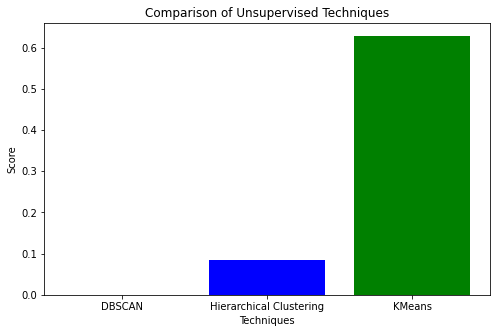

In [26]:

DBSCAN_accuracy = accuracy_score(y_test, dbscan_labels)
hierarchical_accuracy = accuracy_score(y_test, hierarchical_labels)
kmeans_accuracy = accuracy_score(y_test, kmeans_labels)
techniques = ['DBSCAN', 'Hierarchical Clustering', 'KMeans']
accuracies = [DBSCAN_accuracy, hierarchical_accuracy, kmeans_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(techniques, accuracies, color=['orange', 'blue', 'green'])
plt.xlabel('Techniques')
plt.ylabel('Score')
plt.title('Comparison of Unsupervised Techniques')
# plt.ylim(0, 2)  
plt.show()


### Dumping or Saving Our Main Model

In [27]:

joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']